**Study Case 3**

Kelompok 1A
1. Alvinhugo Zuhdi Nurharyadi (11210940000031)
2. Della Wiyanti (11210940000014)
3. Zahra Tifani Apriliana (11210940000029)
4. Puput Hanifah Nuranisa (11210940000017)
5. Zahra Khotimah (11210940000003)
6. M. Ikhwan Farhat (11210940000007)

In [ ]:
# Loading Data:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import numpy as np
from collections import Counter
matplotlib.rcParams['figure.dpi'] = 100
sns.set()
%matplotlib inline
try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/tangerang.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfT.shape

((1024, 26), (998, 26), (128, 26))

# JAKARTA

In [ ]:
# Mengganti type data yang kurang tepat saat dibaca oleh python
dfJ['garasi'] = dfJ['garasi'].astype('category')
dfJ['carport'] = dfJ['carport'].astype('category')
dfJ['lokasi'] = dfJ['lokasi'].astype('category')
dfJ['sertifikat'] = dfJ['sertifikat'].astype('category')
dfJ['hadap'] = dfJ['hadap'].astype('category')
dfJ.dtypes

created_at       object
LT              float64
LB              float64
KT              float64
KM              float64
garasi         category
carport        category
lokasi         category
sertifikat     category
listrik         float64
hadap          category
harga           float64
URL              object
deskripsi        object
Unnamed: 14     float64
Unnamed: 15     float64
Unnamed: 16     float64
Unnamed: 17     float64
Unnamed: 18     float64
Unnamed: 19     float64
Unnamed: 20     float64
Unnamed: 21     float64
Unnamed: 22     float64
Unnamed: 23     float64
Unnamed: 24     float64
Unnamed: 25     float64
dtype: object

## Imputasi Missing Value

In [ ]:
# Mengecek skewness pada variabel yg memiliki missing value di data gedung
dfJ['listrik'].skew(axis = 0, skipna = True)

4.965444851212696

In [ ]:
# Imputasi variabel yang terdapat missing value 
modus = dfJ['garasi'].mode()[0]
dfJ['garasi'] = dfJ['garasi'].fillna(modus)
modus2 = dfJ['carport'].mode()[0]
dfJ['carport'] = dfJ['carport'].fillna(modus2)
modus3 = dfJ['hadap'].mode()[0]
dfJ['hadap'] = dfJ['hadap'].fillna(modus3)
modus4 = dfJ['lokasi'].mode()[0]
dfJ['lokasi'] = dfJ['lokasi'].fillna(modus4)
modus5 = dfJ['sertifikat'].mode()[0]
dfJ['sertifikat'] = dfJ['sertifikat'].fillna(modus5)
median6 = dfJ['listrik'].mode()[0]
dfJ['listrik'] = dfJ['listrik'].fillna(median6)

In [ ]:
dfJ = dfJ.dropna(axis=1,how='all')
dfJ = dfJ.dropna(axis=0,how='all')
dfJ = dfJ.dropna()
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,Timur,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,Timur,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,Timur,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,Timur,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,Timur,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,22-11-2021,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,Timur,3.850000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,06-12-2021,70.0,57.0,3.0,2.0,1.0,2.0,Jakarta Timur,SHM,2200.0,Timur,8.800000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\r\n• 2 Men...
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,06-12-2021,135.0,190.0,5.0,5.0,1.0,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...


In [ ]:
# Mengecek kembali missing value di tiap variabel pada Data Rumah Jual Jakarta
dfJ.isnull().sum()

created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
hadap         0
harga         0
URL           0
deskripsi     0
dtype: int64

In [ ]:
# Mengecek apakah ada data yang sama (duplikasi) di Data Rumah Jual Jakarta
dfJ.duplicated().sum()

0

## Statistika Deskriptif

In [ ]:
dfJ.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LT,112.0,2.519732e+02,3.815684e+02,16.0,7.975000e+01,1.325000e+02,2.525000e+02,3.422000e+03
LB,112.0,2.791518e+02,2.917474e+02,21.0,9.000000e+01,2.000000e+02,3.625000e+02,2.000000e+03
KT,112.0,4.294643e+00,1.943520e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,1.000000e+01
KM,112.0,3.392857e+00,1.751998e+00,1.0,2.000000e+00,3.000000e+00,4.000000e+00,1.000000e+01
listrik,112.0,5.502679e+03,8.159253e+03,900.0,2.200000e+03,3.500000e+03,4.400000e+03,6.600000e+04
harga,112.0,9.368309e+09,1.643600e+10,380000000.0,1.474500e+09,3.400000e+09,7.675000e+09,1.050000e+11


In [ ]:
dfJ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 120
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   created_at  112 non-null    object  
 1   LT          112 non-null    float64 
 2   LB          112 non-null    float64 
 3   KT          112 non-null    float64 
 4   KM          112 non-null    float64 
 5   garasi      112 non-null    category
 6   carport     112 non-null    category
 7   lokasi      112 non-null    category
 8   sertifikat  112 non-null    category
 9   listrik     112 non-null    float64 
 10  hadap       112 non-null    category
 11  harga       112 non-null    float64 
 12  URL         112 non-null    object  
 13  deskripsi   112 non-null    object  
dtypes: category(5), float64(6), object(3)
memory usage: 10.9+ KB


## Visualisasi Data

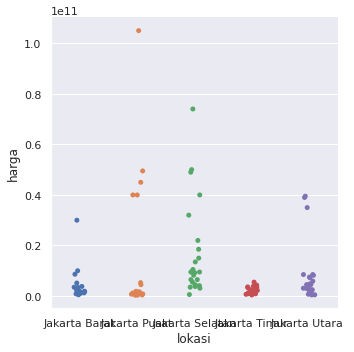

In [ ]:
# Distribusi Harga Rumah Berdasarkan Lokasi Rumah
p = sns.catplot(x="lokasi", y="harga", data=dfJ)

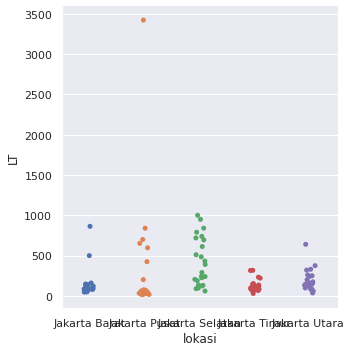

In [ ]:
# Distribusi Luas Tanah Berdasarkan Lokasi Rumah
p = sns.catplot(x="lokasi", y="LT", data=dfJ)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


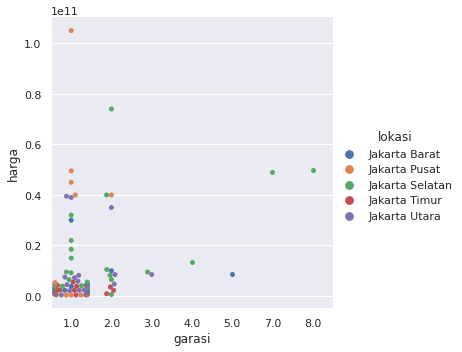

In [ ]:
# Distribusi Harga Rumah Berdasarkan Ketersediaan Garasi dan Lokasi Rumah
q = sns.catplot(x="garasi", y="harga", hue="lokasi", kind="swarm", data=dfJ)

#Interpretasi
Dilihat dari visualisasi pesebaran datanya, harga rumah yang berlokasi di Jakarta Timur cenderung berkumpul di harga yang rendah dibandingkan dengan lokasi lain. Asumsi kami kenapa harganya cenderung rendah, karena diliat dari visualisasi luas tanahnya, luas tanah rumah di jakarta timur juga cenderung berkumpul di rendah.

Saran dari kami adalah rumah yang berlokasi di Jakarta Timur bisa menjadi prioritas dalam pertimbangan dalam investasi properti